In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [2]:
# code settings
pd.set_option('display.max_columns', None)

# visualization settings
plt.rc('figure', figsize=(6,6))
sns.set_style('darkgrid')

# setting seed state
np.random.seed(50)

In [15]:
dataset = load_wine()

In [16]:
# Splits the dataset into training and testing data
x = pd.DataFrame(dataset.data)
y = pd.DataFrame(dataset.target)

split = np.random.rand(len(dataset.data)) < 0.8

X_train, X_test = dataset.data[split], dataset.data[~split]
y_train, y_test = dataset.target[split], dataset.target[~split]

In [17]:
m_nb = MultinomialNB()

%time m_nb.fit(X_train, y_train)

Wall time: 4.02 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [18]:
pred = m_nb.predict(X_test)

In [19]:
type(y_test), y_test.shape

(numpy.ndarray, (36,))

In [20]:
type(pred)

numpy.ndarray

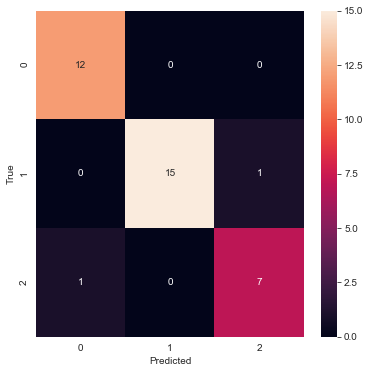

In [21]:
test = pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'])

sns.heatmap(test, annot=True)

In [104]:
# https://stackoverflow.com/questions/31421413/how-to-compute-precision-recall-accuracy-and-f1-score-for-the-multiclass-case

print('Accuracy score: ', format(metrics.accuracy_score(y_test, pred)))
print('Precision score: ', format(metrics.precision_score(y_test, pred, average='micro')))
print('Recall score: ', format(metrics.recall_score(y_test, pred, average='micro')))
print('F1 score: ', format(metrics.f1_score(y_test, pred, average='micro')))

Accuracy score:  0.9444444444444444
Precision score:  0.9444444444444444
Recall score:  0.9444444444444444
F1 score:  0.9444444444444444


In [32]:
def create_larger_ds():
    ab_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', 
                          header=None)
    
    ab_target = pd.DataFrame()
    
    # feature engineering features
    ab_features = ab_data.drop(ab_data.columns[8], axis=1)
    ab_features_pro = pd.get_dummies(ab_features)

    # feature engineering target
    ab_target['age'] = pd.cut(ab_data.iloc[:,8], range(1, 29, 5))
    ab_target['age'] = ab_target['age'].astype(str)
    
    ab_target_pro = ab_target.apply(LabelEncoder().fit_transform)
    
    X_train, X_test, y_train, y_test = train_test_split(ab_features_pro, ab_target_pro, test_size=0.2, random_state=50)
    
    return X_train, X_test, np.squeeze(y_train.values), np.squeeze(y_test.values)

In [24]:
X_train, X_test, y_train, y_test = create_larger_ds()

In [25]:
m_nb = MultinomialNB()

%time m_nb.fit(X_train, y_train)

Wall time: 3.99 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [25]:
y_test['age'].value_counts(normalize=True)

4    0.671053
1    0.174641
0    0.110048
2    0.040670
3    0.003589
Name: age, dtype: float64

In [26]:
pred = m_nb.predict(X_test)

In [27]:
metrics.accuracy_score(y_test, pred)

0.6710526315789473

In [72]:
test = pd.crosstab(np.squeeze(y_test.values), pred, rownames=['True'], colnames=['Predicted'])
test
#sns.heatmap(test, annot=True)

Predicted,4
True,
0,92
1,146
2,34
3,3
4,561


Evaluate model
- Predicts only 4 because of class imbalance. Accuracy is equal to y_test.value_counts